# Midterm Project 1 (100 points total)

## In this project, you need to build a Logistic Regression model from scratch to classify patients with and without a heart disease.

### At first, import the necessary libraries. (5 points)

In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### After that, upload the data and preprocess it. (10 points)

In [2]:
# Upload the data, separate the features and the labels into X and y variables
data = pd.read_csv('heart_disease_classification.csv')
y = data['target']
X = data.drop(['target'], axis = 1)

# One-hot-encode the necessary columnns (which columns do we need to one-hot-encode?)
#columns cp, thal and scope need to be one hot encoded
a = pd.get_dummies(X['cp'], prefix = "cp")
b = pd.get_dummies(X['thal'], prefix = "thal")
c = pd.get_dummies(X['slope'], prefix = "slope")

X_expanded = pd.concat([X, a, b, c], axis=1)

X = X_expanded.drop(columns = ['cp', 'thal', 'slope']).astype('float')




# Normalize the features
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values


### Before starting to code the Logistic Regression model, check if your data is ready.

In [3]:
print(X.head())

        age  sex  trestbps      chol  fbs  restecg   thalach  exang   oldpeak  \
0  0.708333  1.0  0.481132  0.244292  1.0      0.0  0.603053    0.0  0.370968   
1  0.166667  1.0  0.339623  0.283105  0.0      0.5  0.885496    0.0  0.564516   
2  0.250000  0.0  0.339623  0.178082  0.0      0.0  0.770992    0.0  0.225806   
3  0.562500  1.0  0.245283  0.251142  0.0      0.5  0.816794    0.0  0.129032   
4  0.583333  0.0  0.245283  0.520548  0.0      0.5  0.702290    1.0  0.096774   

    ca  ...  cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  slope_0  \
0  0.0  ...   0.0   0.0   1.0     0.0     1.0     0.0     0.0      1.0   
1  0.0  ...   0.0   1.0   0.0     0.0     0.0     1.0     0.0      1.0   
2  0.0  ...   1.0   0.0   0.0     0.0     0.0     1.0     0.0      0.0   
3  0.0  ...   1.0   0.0   0.0     0.0     0.0     1.0     0.0      0.0   
4  0.0  ...   0.0   0.0   0.0     0.0     0.0     1.0     0.0      0.0   

   slope_1  slope_2  
0      0.0      0.0  
1      0.0      0.0  
2 

### Split the data into training and test sets. Use a 80-20 split ratio.

In [4]:
#Create the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

### Now you can start building your Logistic Regression model.

#### You need a bunch of helper functions. Let's start with initialize and sigmoid. (10 points each)

In [5]:
# Write the initialize function (Hint: Look up how to use the np.random sublibrary)
# It needs one input: dimension
# It will return two outputs: random weights and random bias
def initialize(dimension):
    weights = np.random.rand(dimension,1)
    weights = weights.flatten()
    bias = np.random.rand()
#     bias = bias.flatten()
    
    return  weights, bias

In [6]:
# Check if your function works with the following test case

np.random.seed(123)

weights,bias = initialize(6)

print(weights)
print(bias)

#Should be weights = [0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646] and bias = 0.9807641983846155

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
0.9807641983846155


In [7]:
# Write the sigmoid function (one input, one output - formula given in the slides)
def sigmoid(X):
    
    sigma = 1/(1+np.exp(-X))
    
    return sigma

In [8]:
# Check if your function works with the following test cases

print(sigmoid(0)) #should be 0.5

print(sigmoid(-5)) #should be 0.00669

print(sigmoid(3)) #should be 0.95257

0.5
0.0066928509242848554
0.9525741268224334


#### Next two helper functions will be calculate_cost_gradient and GradientDescent. (20 points each) The functions we have written for Linear Regression can help you but keep in mind that the cost function is crossentropy and the gradients will change accordingly. 

#### Also, you need to include the tol value to GradientDescent, so it stops at convergence. Make sure the GradientDescent function returns the cost after every iteration, prints the final cost and plots the cost vs number of iterations.

In [9]:
# Write the calculate_cost_gradient function
def calculate_cost_gradient(weights, bias, X_train, y_train):
    #gradient descent step 1
    y_output = np.dot(X_train, weights) + bias
    cost = (y_train*np.log(sigmoid(y_output)) + (1-y_train)*np.log(1-sigmoid(y_output)))
    cost = -np.sum(cost)/X_train.shape[0]
    
    derivative_weight = -np.dot(X_train.T, y_train - sigmoid(y_output))/X_train.shape[0]
    derivative_bias = -np.sum(y_train - sigmoid(y_output))/X_train.shape[0]
    
    gradient = {'weight_gradient': derivative_weight, 'bias_gradient': derivative_bias}
    
    return cost, gradient
    

In [10]:
# Write the GradientDescent function (Do not forget to include tol as an extra input)
def GradientDescent(old_weights, bias, x_train, y_train, lr, iters, tol):
    
    costList = []
    index = []
    
    for ii in range(iters):
        
        cost, gradients = calculate_cost_gradient(old_weights, bias, X_train, y_train)
        
        new_weights = old_weights - lr*gradients['weight_gradient']
        bias = bias - lr*gradients['bias_gradient']
        
        costList.append(cost)
        index.append(ii)
    
        if(np.linalg.norm(new_weights - old_weights) < tol):
            break
        old_weights = new_weights 
        
    model_parameters = {'weights': new_weights, 'bias': bias}
    
    print('iterations:', iters)
    print('cost:', cost)
    
    #plot to see how the cost decreases
    
    plt.plot(index, costList)
    plt.xlabel('num of iters')
    plt.ylabel('Cost')
    plt.show()
    
    return model_parameters

#### The last helper function you need to write is predict. (10 points) It takes the model parameters and the test data as inputs and returns the test predictions. (Predicted labels)

In [11]:
#Write the predict function
def predict(model_parameters, X_test):
    
    w = model_parameters["weights"]
    b = model_parameters["bias"]
    
    y_temp =  np.dot(X_test, w) + b
    
    y_pred = [0 for x in range(len(y_temp))]
    y_pred = np.array(y_pred)
    
    for i in range(len(y_temp)):
        if(sigmoid(y_temp[i]) >= 0.5):
            y_pred[i] = 1
        else:
            y_pred[i] = 0
        
       
  
    
    return y_pred
    

In [12]:
# Check if your function works with the following test case

x_testcase = np.array([[1, 3, 4 ,7],[4, 6, -7, -9], [1, 3, 5, 7]])
params = {'weights':[1, 2, 3, 4], 'bias':5}

print(predict(params,x_testcase)) #Should be [1, 0 ,1]


[1 0 1]


#### Lastly, you need to write the logistic regression function. (5 points) Keep in mind that you need to initialize the parameters, optimize them, get the predictions for test data and evaluate the performance of the model. The evaluation metric for classification is accuracy. Make sure the function prints the test accuracy like the linear regression function we wrote in class.

In [13]:
# Write the logistic regression function.
def logistic_regression(X_train, y_train, X_test, y_test, lr, iters, tol):
    
    #Initialize
    init_weights, init_bias = initialize(X_train.shape[1])
    
    print("init_weights", init_weights.shape)
    print("init_bias", init_bias)
    #Train the ML model
    parameters = GradientDescent(init_weights, init_bias, X_train, y_train, lr, iters, tol)
    
    
#     print(X_test.shape)
    print("weights", parameters["weights"])
    print("bias", parameters["bias"])
    
    
    
    #Get predictions for test data
    y_pred = predict(parameters, X_test)
    
#     print("y_pred", y_pred)
    
    #Evaluate
    print("Test accuracy: {:.2f}".format((100*np.mean(y_pred == y_test))) + '%')
    
    return parameters 

#### Now, you need to run your logistic regression function with the training and the test datasets defined at the beginning.

#### The stepsize (learning rate), number of iterations and tolerance values will be your choice. Tune them until the model matches the accuracy we found in class with the built-in model. (10 points)

init_weights (21,)
init_bias 0.29371404638882936
iterations: 1000
cost: 0.4200200719278874


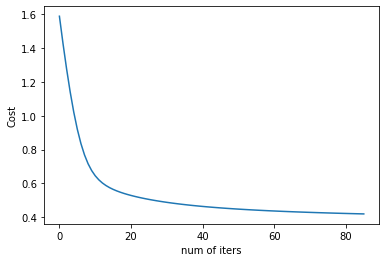

weights [ 0.14036837 -0.56109736  0.01673382  0.13323739  0.29767462  0.34299887
  0.0478082  -0.47406742  0.23110673 -0.56970689 -0.70379655  0.65176924
  0.74282024  0.61851864  0.82807229  0.46747044  1.23817292 -0.19028175
  0.16235102 -0.37753217  0.56427184]
bias -0.27020606194129154
Test accuracy: 86.89%


{'weights': array([ 0.14036837, -0.56109736,  0.01673382,  0.13323739,  0.29767462,
         0.34299887,  0.0478082 , -0.47406742,  0.23110673, -0.56970689,
        -0.70379655,  0.65176924,  0.74282024,  0.61851864,  0.82807229,
         0.46747044,  1.23817292, -0.19028175,  0.16235102, -0.37753217,
         0.56427184]),
 'bias': -0.27020606194129154}

In [14]:
logistic_regression(X_train, y_train, X_test, y_test, lr=0.2, iters=1000, tol=0.01)

In [15]:
# Test Accuracy is 86.89%